In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM：人均犯罪率
ZN：25,000平方英尺以上民用土地的比例
INDUS：城镇非零售业商用土地比例
CHAS：是否邻近查尔斯河，1是邻近，0是不邻近
NOX：一氧化氮浓度（千万分之一）
RM：住宅的平均房间数
AGE：自住且建于1940年前的房屋比例
DIS：到5个波士顿就业中心的加权距离
RAD：到高速公路的便捷度指数
TAX：每万元的房产税率
PTRATIO：城镇学生教师比例
B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例
LSTAT：低收入人群比例
MEDV：自住房中位数价格，单位是千元

In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# 考古題和驗證題分開來
from sklearn.model_selection import train_test_split
# 回傳: [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"], 
                                                    boston["target"], 
                                                    test_size=0.1)

In [4]:
# 第一步: 做考古題
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=4)
# 訓練考古題
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

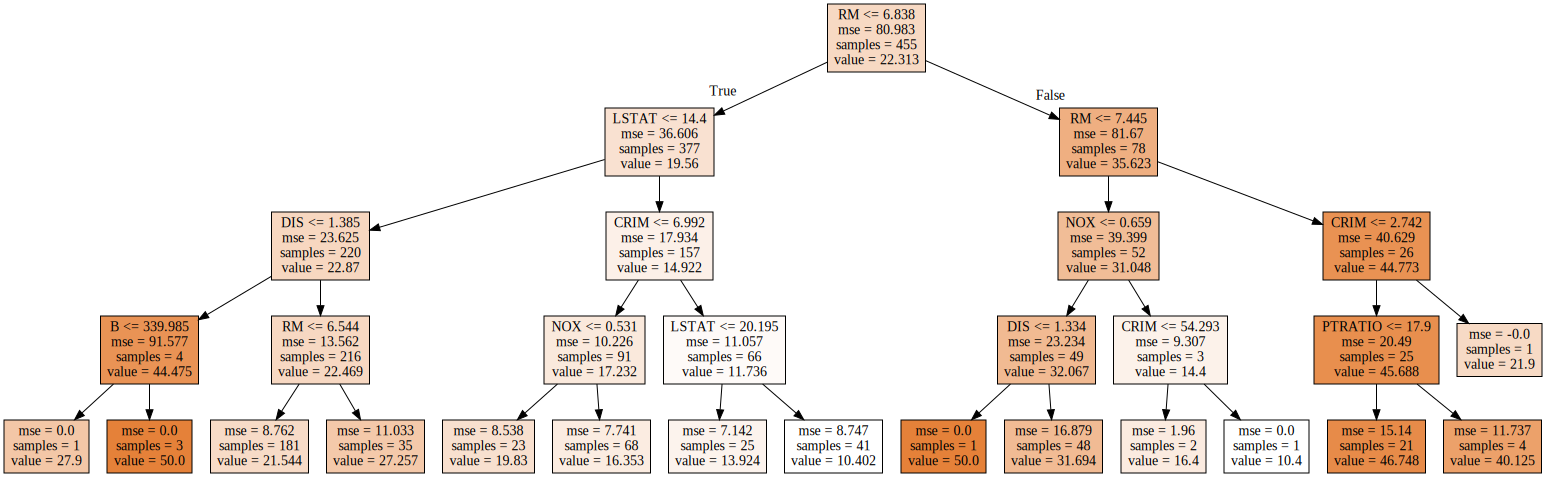

In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, feature_names=boston["feature_names"], filled=True)
result = graphviz.Source(g)
result.render("boston")
result

In [15]:
# 第二步: 驗證一下公式好壞
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("r2 score:", r2_score(y_test, pre))

r2 score: 0.895341889838301
